results_activelearning_abt_buy_attrelbow_density.csv
AUC no bootstrapping: 6116.050000
AUC no bootstrapping warm: 6115.100000
AUC with bootstrapping: 7115.450000


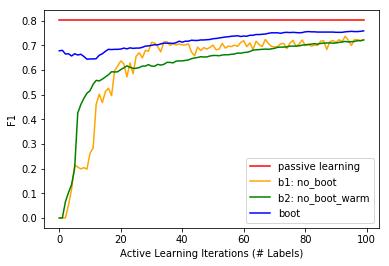

In [4]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
filenames=[
         
    "../results/results_activelearning_abt_buy_attrelbow_density.csv"
         ]

query_limit = 100
for filename in filenames: 
    print(filename.split('/')[-1])
    with open(filename) as fd:
        reader=csv.reader(fd)
        no_boot=np.float_([row for idx, row in enumerate(reader) if idx == 1][0][1:query_limit+1])

    with open(filename) as fd:
        reader=csv.reader(fd)
        no_boot_warm = np.float_([row for idx, row in enumerate(reader) if idx == 3][0][1:query_limit+1])
        
    with open(filename) as fd:
        reader=csv.reader(fd)
        boot = np.float_([row for idx, row in enumerate(reader) if idx == 5][0][1:query_limit+1])        
    
    name = 'null'
   
    # results from passive learning
    if ('VIAF' in filename):
        passive_learning = [0.981]
        name ='VIAF'
    if ('Dnb' in filename):
        passive_learning = [0.976]
        name ='Dnb'
    if ('amazon_google' in filename):
        passive_learning = [0.699]
        name ='amazon_google'
    if ('abt' in filename):
        passive_learning = [0.802]
        name ='abt'   
    if ('_phones' in filename):
        passive_learning = [0.851]
        name ='_phones'
    if ('_headphones' in filename):
        passive_learning = [0.966]
        name ='_headphones'
    
    
    
    passive_learning = passive_learning*len(no_boot)
    no_boot_area = np.trapz(no_boot, dx=len(no_boot))
    boot_area = np.trapz(boot, dx=len(boot))    
    no_boot_warm_area = np.trapz(no_boot_warm, dx=len(no_boot_warm))
    
    print ("AUC no bootstrapping: %f" % no_boot_area)
    print ("AUC no bootstrapping warm: %f" % no_boot_warm_area)
    print ("AUC with bootstrapping: %f" % boot_area)
    

    query_num = np.arange(0,len(no_boot))
    
    fig, ax = plt.subplots()
    pas_, =  ax.plot(passive_learning, color="red", label="passive learning")
    noboot_, = ax.plot(no_boot, color="orange", label="b1: no_boot")
    boot_, = ax.plot(boot, color="blue", label="boot")
    no_boot_warm_, = ax.plot(no_boot_warm, color="green", label="b2: no_boot_warm")    
   
    ax.set_xlabel("Active Learning Iterations (# Labels)")
    ax.set_ylabel("F1")
    ax.legend(handles=[pas_, noboot_, no_boot_warm_, boot_])
    
    plt.savefig(filename.replace(".csv", "_graph.png"), bbox_inches='tight')
    

    